## Gathering Data

In [1]:
import pandas as pd
import numpy as np
import requests as req
import tweepy
import json
import matplotlib

### I. df_enhanced dataset

In [2]:
df_enhanced = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
df_enhanced.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### II. df_breed Dataset

In [4]:
r = req.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')

In [5]:
# Checking content type and seperator
r.headers['content-type']

'text/tab-separated-values; charset=utf-8'

In [6]:
path = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

In [7]:
df_breed = pd.read_csv(path, sep = '\t')

In [8]:
df_breed.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### III. df_tweets Dataset

In [9]:
consumer_key = "HIDDEN"
consumer_secret = "HIDDEN"
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [10]:
id_list = df_enhanced['tweet_id']

In [11]:
id_list.head()

0    892420643555336193
1    892177421306343426
2    891815181378084864
3    891689557279858688
4    891327558926688256
Name: tweet_id, dtype: int64

In [12]:
# creating a list for the exceptions
exceptions_list = []

# opening the file to write
with open('tweet_json.txt', 'w', encoding = 'utf-8') as f:
    for id_tweet in id_list: 
        try:
            tweet = api.get_status(id_tweet, tweet_mode= 'extended')
            json.dump(tweet._json, f)
# writing the content witt new paragraphs
            f.write("\n")
        except Exception as e:
            exceptions_list.append(id_tweet)
# printing out the exception messages
            print(str(e))


[{'code': 144, 'message': 'No status found with that ID.'}]
[{'code': 144, 'message': 'No status found with that ID.'}]
[{'code': 144, 'message': 'No status found with that ID.'}]
[{'code': 144, 'message': 'No status found with that ID.'}]
[{'code': 144, 'message': 'No status found with that ID.'}]
[{'code': 144, 'message': 'No status found with that ID.'}]
[{'code': 144, 'message': 'No status found with that ID.'}]
[{'code': 144, 'message': 'No status found with that ID.'}]
[{'code': 144, 'message': 'No status found with that ID.'}]
[{'code': 144, 'message': 'No status found with that ID.'}]
[{'code': 144, 'message': 'No status found with that ID.'}]
[{'code': 144, 'message': 'No status found with that ID.'}]
[{'code': 144, 'message': 'No status found with that ID.'}]
[{'code': 144, 'message': 'No status found with that ID.'}]
[{'code': 144, 'message': 'No status found with that ID.'}]
[{'code': 144, 'message': 'No status found with that ID.'}]
[{'code': 144, 'message': 'No status fou

In [13]:
# Reading the json file
df_full_json = pd.read_json('tweet_json.txt', orient='records', lines = True)

In [14]:
# Checking the columns to find out which values we would like to extract.

df_full_json.columns

Index(['contributors', 'coordinates', 'created_at', 'display_text_range',
       'entities', 'extended_entities', 'favorite_count', 'favorited',
       'full_text', 'geo', 'id', 'id_str', 'in_reply_to_screen_name',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status',
       'lang', 'place', 'possibly_sensitive', 'possibly_sensitive_appealable',
       'quoted_status', 'quoted_status_id', 'quoted_status_id_str',
       'quoted_status_permalink', 'retweet_count', 'retweeted',
       'retweeted_status', 'source', 'truncated', 'user'],
      dtype='object')

In [15]:
# As I should exclude retweets, I also want to know a tweet's retweet status.

df_tweets = df_full_json[['id','favorite_count', 'retweet_count', 'retweeted']]

In [16]:
df_tweets.head()

,id,favorite_count,retweet_count,retweeted
0,892420643555336193,36388,7743,False
1,892177421306343426,31338,5730,False
2,891815181378084864,23612,3794,False
3,891689557279858688,39685,7907,False
4,891327558926688256,37884,8529,False


In [17]:
df_tweets.shape

(2326, 4)

## Assesing Data

### I. df_tweets dataset

Print out the df_tweets dataset.

In [18]:
df_tweets

,id,favorite_count,retweet_count,retweeted
0,892420643555336193,36388,7743,False
1,892177421306343426,31338,5730,False
2,891815181378084864,23612,3794,False
3,891689557279858688,39685,7907,False
4,891327558926688256,37884,8529,False
5,891087950875897856,19074,2852,False
6,890971913173991426,11115,1862,False
7,890729181411237888,61312,17275,False
8,890609185150312448,26271,3935,False
9,890240255349198849,30006,6736,False


Check for possible retweets in the dataset

In [19]:
len(df_tweets.query('retweeted == True'))

0

Check for duplicated values using ID

In [20]:
df_tweets[df_tweets['id'].duplicated(keep=False)]

,id,favorite_count,retweet_count,retweeted


In [21]:
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2326 entries, 0 to 2325
Data columns (total 4 columns):
id                2326 non-null int64
favorite_count    2326 non-null int64
retweet_count     2326 non-null int64
retweeted         2326 non-null bool
dtypes: bool(1), int64(3)
memory usage: 56.9 KB


### II. df_enhanced dataset

In [22]:
df_enhanced

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


Counted and grouped the dog names to discover the invalid dog names in the dataset. According to my observations, all the incorrect dog names start with a lower case letter and are detected as name based on the text column.

In [23]:
df_enhanced.groupby('name')['name'].size()

name
Abby             2
Ace              1
Acro             1
Adele            1
Aiden            1
Aja              1
Akumi            1
Al               1
Albert           2
Albus            2
Aldrick          1
Alejandro        1
Alexander        1
Alexanderson     1
Alf              1
Alfie            5
Alfy             1
Alice            2
Amber            1
Ambrose          1
Amy              1
Amélie           1
Anakin           2
Andru            1
Andy             1
Angel            1
Anna             1
Anthony          1
Antony           1
Apollo           1
                ..
Ziva             1
Zoe              1
Zoey             3
Zooey            1
Zuzu             1
a               55
actually         2
all              1
an               7
by               1
getting          2
his              1
incredibly       1
infuriating      1
just             4
life             1
light            1
mad              2
my               1
not              2
officially       1
old    

In [24]:
df_enhanced['name'].describe()

count     2356
unique     957
top       None
freq       745
Name: name, dtype: object

Cheking the null values and datatypes.

In [25]:
df_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

Check for duplicates using ID

In [26]:
df_enhanced[df_enhanced['tweet_id'].duplicated(keep=False)]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### III. df_breed

In [27]:
df_breed.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


Getting info on the datatypes of the columns

In [28]:
df_breed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


Listing the null values (if there are any).

In [29]:
nulls = df_breed.columns[df_breed.isnull().any()]
df_breed[nulls].isnull().sum()

Series([], dtype: float64)

## Summary

#### Tidiness:
   
- There are 3 dataset instead of 1 master dataset
    
df_enhanced dataset:
    
- Unecessary source column with hardly readable information
- Unecessary category columns:  doggo, floofer, pupper, puppo 
    
df_breed dataset:

- Presence of multiple stages columns
- Stages column could be categorical datatype
    
#### Quality:
    
df_enhanced dataset:
    
- The dog_stage is string datatype
- Unecessary rating denominator column, rating numerator column header without scale
- Incorrect names, missing names in name column: such?, quite, a, an, the... - all are written with lower case letters
- Retweeted records: retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp
- Missing data in name and stages columns showing as 'None'
- Incorrect datatypes: timestamp is string
- In_reply_to_status_id, in_reply_to_user_id should be changed from sciantific float to string
- Wrong rating numeratores were extracted from the text column
    
df_breed dataset:
    
- Dog breeds start with lower case letters
- Non-dog records in the dataset (eg.: shopping cart, box turtle...)
- The p1, p2, p2 columns shoulf be categorical datatypes
    

## Cleaning Process

### I. df_enhanced Data

#### Define: 
Retweeted records in the dataset: retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp

#### Code: 
I wanted to analyze the orignal ratings, so I deleted the retweeted tweets. I queried the records where the retweeted status was not null and dropped the values. I also dropped the unecessary retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp columns.

In [30]:
# Creating a copy of the original dataset before cleaning

df_enhanced_original = df_enhanced.copy()

In [31]:
len(df_enhanced.query('retweeted_status_id != "NaN"'))

181

I created a new dataframe without the retweeted tweets.

#### Merge multiple dog stages

In [32]:
df_enhanced = df_enhanced.query('retweeted_status_id == "NaN"')

In [33]:
df_enhanced.groupby(["doggo", "floofer", "pupper", "puppo"]).size().reset_index().rename(columns={0: "count"})

,doggo,floofer,pupper,puppo,count
0,None,None,None,None,1831
1,None,None,None,puppo,24
2,None,None,pupper,None,224
3,None,floofer,None,None,9
4,doggo,None,None,None,75
5,doggo,None,None,puppo,1
6,doggo,None,pupper,None,10
7,doggo,floofer,None,None,1


In [34]:
df_enhanced.doggo.replace('None', '', inplace=True)
df_enhanced.pupper.replace('None', '', inplace=True)
df_enhanced.puppo.replace('None', '', inplace=True)
df_enhanced.floofer.replace('None', '', inplace=True)

C:\Users\sakthiganesh.m\AppData\Local\Continuum\anaconda3\envs\Machine19\lib\site-packages\pandas\core\generic.py:6586: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [35]:
df_enhanced['stage'] = df_enhanced.doggo + df_enhanced.floofer + df_enhanced.pupper + df_enhanced.puppo
df_enhanced.loc[df_enhanced.stage == 'doggopupper', 'stage'] = 'doggo, pupper'
df_enhanced.loc[df_enhanced.stage == 'doggopuppo', 'stage'] = 'doggo, puppo'
df_enhanced.loc[df_enhanced.stage == 'doggofloofer', 'stage'] = 'doggo, floofer'

C:\Users\sakthiganesh.m\AppData\Local\Continuum\anaconda3\envs\Machine19\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\sakthiganesh.m\AppData\Local\Continuum\anaconda3\envs\Machine19\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [36]:
df_enhanced.stage.value_counts()

                  1831
pupper             224
doggo               75
puppo               24
doggo, pupper       10
floofer              9
doggo, puppo         1
doggo, floofer       1
Name: stage, dtype: int64

#### Test: 

Doublechecking the results.

In [37]:
len(df_enhanced.query('retweeted_status_id != "NaN"'))

0

After testing, I dropped the unecessary empty columns.

In [38]:
df_enhanced = df_enhanced.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1)

#### Define: 
Unecessary rating denominator column, rating numerator column header without scale

#### Code:

I dropped the rating denominator column and add a scale to the numerator column in the title.

I deleted the unecessary rating denominator column and renamed the rating numerator include and mark the rating denominator as well.

In [39]:
df_enhanced = df_enhanced.drop('rating_denominator', axis=1)

In [40]:
df_enhanced = df_enhanced.rename(index=str, columns={"rating_numerator": "rating_10_scale"})

#### Test:

In [41]:
df_enhanced.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_10_scale,name,doggo,floofer,pupper,puppo,stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,Phineas,,,,,
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,Tilly,,,,,
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,Archie,,,,,


#### Define:
There are incorrect numerators in the rating_numerator column (decimals are shown as integers)

#### Code: 
I changed the datatype of the column and I extracted the right numerators of the text column with regex. 
I iterated through the df_enhanced database and changed the wrong values with the extracted data on each corresponding row.

Cleaning the rating_numerator columns, extract the right values from the text column.

In [42]:
# setting the rating_10_scale column to float

df_enhanced['rating_10_scale'] = df_enhanced['rating_10_scale'].astype('float')

In [43]:
df_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null object
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_10_scale          2175 non-null float64
name                     2175 non-null object
doggo                    2175 non-null object
floofer                  2175 non-null object
pupper                   2175 non-null object
puppo                    2175 non-null object
stage                    2175 non-null object
dtypes: float64(3), int64(1), object(10)
memory usage: 254.9+ KB


In [44]:
# save values into dataframe where text contains decimals
df_bad_numerator = df_enhanced[df_enhanced.text.str.contains(r"(\d+\.\d*\/\d+)")]

# creating a list to append the extracted values
numerator = []

for item in  df_bad_numerator['text']:
    splitted = item.split('/')
    numerator.append(splitted[0].split()[-1])
print(numerator)

['13.5', '9.75', '11.27', '9.5', '11.26']


C:\Users\sakthiganesh.m\AppData\Local\Continuum\anaconda3\envs\Machine19\lib\site-packages\ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


In [45]:
# save the corresponding tweet_ids into a list
tweet_id_list = df_bad_numerator['tweet_id'].tolist()

for i in range(len(tweet_id_list)):
    # change the numerator in the oroginal dataframe
    df_enhanced.loc[(df_enhanced['tweet_id'] == tweet_id_list[i]), ['rating_10_scale']] = numerator[i]
    # test: print out the changed values in the original daraframe
    print(df_enhanced.loc[(df_enhanced['tweet_id'] == tweet_id_list[i]), ['rating_10_scale']])

   rating_10_scale
45            13.5
    rating_10_scale
695            9.75
    rating_10_scale
763           11.27
     rating_10_scale
1689             9.5
     rating_10_scale
1712           11.26


In [46]:
df_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null object
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_10_scale          2175 non-null object
name                     2175 non-null object
doggo                    2175 non-null object
floofer                  2175 non-null object
pupper                   2175 non-null object
puppo                    2175 non-null object
stage                    2175 non-null object
dtypes: float64(2), int64(1), object(11)
memory usage: 334.9+ KB


#### Define:
More issues regarding the name column: missing values, missing values marked as None, incorrect values

#### Code:

I decided to extract the dog names from the text columns to replace the missing values and correct the incorrect dog names. The valied dog names start with upper-case letters.

I collect some of the cases and expressions when the dog names occur in the text column in the following context:
    - ... named [Dog Name]
    - meet [Dog Name]
    - .. name is [Dog Name]
    - This is [Dog Name]
    - Say hello to [Dog Name]
    - Meet [Dog Name]
    - Here we have [Dog Name]
    - Here is [Dog Name]
    
Then I will iterate through the text column and change the value in the name column based on the text column.

In [47]:
import re

# Creating two lists: one for the names we can' extract and one for the new names
names_clean = []
missing_names = []

# Creating a lit of the texts
text_list = df_enhanced['text'].values.tolist()

# Creating a regex pattern
pattern = re.compile('([A-Z].*)')

# Iterating thourgh the text list and check if the content and pattern correspond to some of the extressions
for text in df_enhanced['text']:
    
    if text.__contains__('This is') and pattern.fullmatch(text.split()[text.split().index("is")+1]):
        names_clean.append(text.split(" ")[2].strip('.').strip(','))
    elif text.startswith("Meet") and pattern.fullmatch(text.split(" ")[1]):
        names_clean.append(text.split(" ")[1].strip('.').strip(','))
    elif text.startswith("Here we have") and pattern.fullmatch(text.split(" ", 3)[3]):
        names_clean.append(text.split(" ")[3].strip('.').strip(','))
    elif text.split(" ").__contains__("named") and pattern.fullmatch(text.split()[text.split().index("named")+1]):
        names_clean.append(text.split()[text.split().index("named")+1].strip('.').strip(','))
    elif text.__contains__("name is") and pattern.fullmatch(text.split()[text.split().index("is")+1]):
        names_clean.append(text.split()[text.split().index("is")+1].strip('.').strip(','))
    elif text.__contains__("Say hello to") and pattern.fullmatch(text.split()[text.split().index("to")+1]):
        names_clean.append(text.split(" ")[3].strip('.').strip(','))
    else:
        names_clean.append("NaN")
        missing_names.append(text)

#### Test:

In [48]:
len(names_clean)

2175

Checking the number of the missing names.

In [49]:
len(missing_names)

755

I looked at the content to see if there are any dog names to extract.

In [50]:
missing_names

["Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh",
 "When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq",
 "Here's a puppo that seems to be on the fence about something haha no but seriously someone help her. 13/10 https://t.co/BxvuXk0UCm",
 "I've yet to rate a Venezuelan Hover Wiener. This is such an honor. 14/10 paw-inspiring af (IG: roxy.thedoxy) https://t.co/20VrLAA8ba",
 'You may not have known you needed to see this today. 13/10 please enjoy (IG: emmylouroo) https://t.co/WZqNqygEyV',
 'This... is a Jubilant Antarctic House Bear. We only rate dogs. Please only send dogs. Thank you... 12/10 would suffocate in floof https://t.co/4Ad1jzJSdp',
 '@NonWhiteHat @MayhewMayhem omg hello tanner you are a scary good boy 12/10 would pet with extreme caution',
 'Here we have a corgi underc

After testing, I saved the new names into the dataframe

In [51]:
df_enhanced['dog_name'] = names_clean

In [52]:
len(df_enhanced['dog_name'])

2175

I compared the original names column with the new, cleaned one. 

In [53]:
df_enhanced[['name']].groupby(['name'])['name'].size()

name
Abby             2
Ace              1
Acro             1
Adele            1
Aiden            1
Aja              1
Akumi            1
Al               1
Albert           2
Albus            2
Aldrick          1
Alejandro        1
Alexander        1
Alexanderson     1
Alf              1
Alfie            4
Alfy             1
Alice            2
Amber            1
Ambrose          1
Amy              1
Amélie           1
Anakin           1
Andru            1
Andy             1
Angel            1
Anna             1
Anthony          1
Antony           1
Apollo           1
                ..
Ziva             1
Zoe              1
Zoey             3
Zooey            1
Zuzu             1
a               55
actually         2
all              1
an               6
by               1
getting          2
his              1
incredibly       1
infuriating      1
just             3
life             1
light            1
mad              1
my               1
not              2
officially       1
old    

Looking at the new names.

In [54]:
df_enhanced[['dog_name']].groupby(['dog_name'])['dog_name'].size()

dog_name
Abby            2
Ace             1
Acro            1
Adele           1
Aiden           1
Aja             1
Akumi           1
Al              1
Albert          2
Albus           2
Aldrick         1
Alejandro       1
Alexander       1
Alexanderson    1
Alf             1
Alfie           4
Alfonso         1
Alfredo         1
Alfy            1
Alice           2
Alphred         1
Amber           1
Ambrose         1
Amy             1
Amélie          1
Anakin          1
Andru           1
Andy            1
Angel           1
Anna            1
               ..
Watson          2
Wesley          1
Wiggles         1
Willem          1
William         1
Willie          1
Willow          1
Willy           1
Wilson          3
Winifred        1
Winnie          4
Winston         8
Wishes          1
Wyatt           3
Wylie           1
Yoda            1
Yogi            2
Yukon           1
Zara            1
Zeek            1
Zeke            3
Zeus            2
Ziva            1
Zoe             1
Z

As we can see at the bottom of the list, there are still some incorrect values with lower case letter. I replace them with NaN.

In [55]:
df_enhanced['dog_name'] = df_enhanced['dog_name'].replace(to_replace = r'^([a-z])', value = np.nan, regex = True)

Final result.

In [56]:
df_enhanced[['dog_name']].groupby(['dog_name'])['dog_name'].size()

dog_name
Abby            2
Ace             1
Acro            1
Adele           1
Aiden           1
Aja             1
Akumi           1
Al              1
Albert          2
Albus           2
Aldrick         1
Alejandro       1
Alexander       1
Alexanderson    1
Alf             1
Alfie           4
Alfonso         1
Alfredo         1
Alfy            1
Alice           2
Alphred         1
Amber           1
Ambrose         1
Amy             1
Amélie          1
Anakin          1
Andru           1
Andy            1
Angel           1
Anna            1
               ..
Wallace         3
Wally           2
Walter          3
Watson          2
Wesley          1
Wiggles         1
Willem          1
William         1
Willie          1
Willow          1
Willy           1
Wilson          3
Winifred        1
Winnie          4
Winston         8
Wishes          1
Wyatt           3
Wylie           1
Yoda            1
Yogi            2
Yukon           1
Zara            1
Zeek            1
Zeke            3
Z

Looking at the missing values.

In [57]:
df_enhanced[df_enhanced['dog_name'] == "NaN"]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_10_scale,name,doggo,floofer,pupper,puppo,stage,dog_name
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,None,,,,,,NaN
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,None,,,,,,NaN
12,889665388333682689,NaN,NaN,2017-07-25 01:55:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo that seems to be on the fence a...,https://twitter.com/dog_rates/status/889665388...,13,None,,,,puppo,puppo,NaN
22,887517139158093824,NaN,NaN,2017-07-19 03:39:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I've yet to rate a Venezuelan Hover Wiener. Th...,https://twitter.com/dog_rates/status/887517139...,14,such,,,,,,NaN
24,887343217045368832,NaN,NaN,2017-07-18 16:08:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",You may not have known you needed to see this ...,https://twitter.com/dog_rates/status/887343217...,13,None,,,,,,NaN
25,887101392804085760,NaN,NaN,2017-07-18 00:07:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This... is a Jubilant Antarctic House Bear. We...,https://twitter.com/dog_rates/status/887101392...,12,None,,,,,,NaN
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,12,None,,,,,,NaN
37,885167619883638784,NaN,NaN,2017-07-12 16:03:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a corgi undercover as a malamute....,https://twitter.com/dog_rates/status/885167619...,13,None,,,,,,NaN
41,884441805382717440,NaN,NaN,2017-07-10 15:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...","I present to you, Pup in Hat. Pup in Hat is gr...",https://twitter.com/dog_rates/status/884441805...,14,None,,,,,,NaN
42,884247878851493888,NaN,NaN,2017-07-10 03:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",OMG HE DIDN'T MEAN TO HE WAS JUST TRYING A LIT...,https://twitter.com/kaijohnson_19/status/88396...,13,None,,,,,,NaN


I dropped the name column.

In [58]:
df_enhanced = df_enhanced.drop('name', axis = 1)

Moving the dog_name column forward, to the place of the old name column, using pop and ix.

Source: https://stackoverflow.com/questions/25122099/move-column-by-name-to-front-of-table-in-pandas

In [59]:
cols = list(df_enhanced)

cols.insert(8, cols.pop(cols.index('dog_name')))

In [60]:
cols

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating_10_scale',
 'dog_name',
 'doggo',
 'floofer',
 'pupper',
 'puppo',
 'stage']

In [61]:
df_enhanced = df_enhanced.ix[:, cols]

C:\Users\sakthiganesh.m\AppData\Local\Continuum\anaconda3\envs\Machine19\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


In [62]:
df_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null object
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_10_scale          2175 non-null object
dog_name                 2172 non-null object
doggo                    2175 non-null object
floofer                  2175 non-null object
pupper                   2175 non-null object
puppo                    2175 non-null object
stage                    2175 non-null object
dtypes: float64(2), int64(1), object(11)
memory usage: 334.9+ KB


#### Define:
Incorrect datatypes (timestamp, retweetd_status_id, retweeted_status_user_id, retweeted_status_timestamp)


#### Code:
Changing the incorrect data types:
- timestamp
- retweeted_status_id 
- retweeted_status_user_id 
- retweeted_status_timestamp

In [63]:
df_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null object
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_10_scale          2175 non-null object
dog_name                 2172 non-null object
doggo                    2175 non-null object
floofer                  2175 non-null object
pupper                   2175 non-null object
puppo                    2175 non-null object
stage                    2175 non-null object
dtypes: float64(2), int64(1), object(11)
memory usage: 334.9+ KB


In [64]:
df_enhanced.timestamp = pd.to_datetime(df_enhanced.timestamp)

In [65]:
df_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null datetime64[ns, UTC]
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_10_scale          2175 non-null object
dog_name                 2172 non-null object
doggo                    2175 non-null object
floofer                  2175 non-null object
pupper                   2175 non-null object
puppo                    2175 non-null object
stage                    2175 non-null object
dtypes: datetime64[ns, UTC](1), float64(2), int64(1), object(10)
memory usage: 334.9+ KB


According to the following post values with float datatype can not be converted to integer if there are any missing values and NaN data. I did not want to replace the missing values with 0 by using the fillna() function. So, I decided to convert the ids to object and scientific format to simple format. There is not any problem with that as we treat these id values as strings and do not expect to do any numerical operations with them anyway.

https://stackoverflow.com/questions/41550746/error-using-astype-when-nan-exists-in-a-dataframe

I used lambda and map function to convert floats in scientific format to simple string format in case of in_reply_to_status_id and in_reply_to_user_id.

https://stackoverflow.com/questions/41157981/pandas-convert-float-in-scientific-notation-to-string/41158287

In [66]:
df_enhanced['in_reply_to_status_id'] = df_enhanced.in_reply_to_status_id.map(lambda x: '{:.0f}'.format(x))
df_enhanced['in_reply_to_user_id'] = df_enhanced.in_reply_to_user_id.map(lambda x: '{:.0f}'.format(x))

#### Test:

I printed out the not null values.

In [67]:
df_enhanced[df_enhanced['in_reply_to_status_id'] != 'nan']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_10_scale,dog_name,doggo,floofer,pupper,puppo,stage
30,886267009285017600,886266357075128320,2281181600,2017-07-15 16:51:35+00:00,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,12,NaN,,,,,
55,881633300179243008,881607037314052096,47384430,2017-07-02 21:58:53+00:00,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,17,NaN,,,,,
64,879674319642796034,879553827334172672,3105440746,2017-06-27 12:14:36+00:00,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,14,NaN,,,,,
113,870726314365509632,870726202742493184,16487760,2017-06-02 19:38:25+00:00,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,10,NaN,,,,,
148,863427515083354112,863425645568774144,77596200,2017-05-13 16:15:35+00:00,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,12,NaN,,,,,
149,863079547188785154,667152164079423488,4196983835,2017-05-12 17:12:53+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Ladies and gentlemen... I found Pipsy. He may ...,https://twitter.com/dog_rates/status/863079547...,14,NaN,,,,,
179,857214891891077121,857156678055342080,180670967,2017-04-26 12:48:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",@Marc_IRL pixelated af 12/10,NaN,12,NaN,,,,,
184,856526610513747968,855818117272018944,4196983835,2017-04-24 15:13:52+00:00,"<a href=""http://twitter.com/download/iphone"" r...","THIS IS CHARLIE, MARK. HE DID JUST WANT TO SAY...",https://twitter.com/dog_rates/status/856526610...,14,NaN,,,,,
186,856288084350160898,856286004109553664,279280991,2017-04-23 23:26:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",@xianmcguire @Jenna_Marbles Kardashians wouldn...,NaN,14,NaN,,,,,
188,855862651834028034,855861584463351808,194351775,2017-04-22 19:15:32+00:00,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,420,NaN,,,,,


#### Define: 

Unecessary category columns:  doggo, floofer, pupper, puppo

#### Code:

I merged the dog stage columns into one column.

In [68]:
columns_melt = df_enhanced.loc[ :, 'doggo' : 'puppo']
columns_remain = df_enhanced.loc[:, 'tweet_id': 'dog_name']

df_enhanced = pd.melt(df_enhanced, id_vars = columns_remain, value_vars = columns_melt, 
                         var_name = 'stages', value_name = 'dog_stage')

In [69]:
df_enhanced = df_enhanced.drop('stages', axis = 1)

As we can see, there is a lot of duplicated data.

In [70]:
df_enhanced.duplicated(subset = "tweet_id").sum()

6525

I sorted and deleted the duplicate data. I had to keep the last records because the first had None values.

In [71]:
df_enhanced = df_enhanced.sort_values('dog_stage').drop_duplicates('tweet_id', keep = 'last')

#### Test:

Double check the results: print out the lenght and count the duplicate data by id.

In [72]:
len(df_enhanced)

2175

In [73]:
df_enhanced.duplicated(subset = "tweet_id").sum()

0

#### Define:
Source column is not readable

#### Code:

I created a new user_source column based on the source column values.
I dropped the unecessary long source column a create a new column based on the source values.

In [74]:
print(df_enhanced['source'])

2095    <a href="http://twitter.com/download/iphone" r...
2094    <a href="http://twitter.com" rel="nofollow">Tw...
2093    <a href="http://twitter.com" rel="nofollow">Tw...
2092    <a href="http://twitter.com" rel="nofollow">Tw...
2091    <a href="http://twitter.com" rel="nofollow">Tw...
2090    <a href="http://twitter.com" rel="nofollow">Tw...
2089    <a href="http://twitter.com" rel="nofollow">Tw...
2088    <a href="http://twitter.com" rel="nofollow">Tw...
2087    <a href="http://twitter.com" rel="nofollow">Tw...
2086    <a href="http://twitter.com" rel="nofollow">Tw...
2085    <a href="http://twitter.com" rel="nofollow">Tw...
2084    <a href="http://twitter.com" rel="nofollow">Tw...
2083    <a href="http://twitter.com" rel="nofollow">Tw...
2082    <a href="http://twitter.com" rel="nofollow">Tw...
2096    <a href="http://twitter.com/download/iphone" r...
2081    <a href="http://twitter.com" rel="nofollow">Tw...
2079    <a href="http://twitter.com" rel="nofollow">Tw...
2078    <a hre

I extracted the source of the source column.

In [75]:
source = df_enhanced['source']

user_source = []

for item in df_enhanced['source']:
    if item.__contains__("Twitter for iPhone"):
        user_source.append("Twitter for iPhone")
    elif item.__contains__("Twitter Web Client"):
        user_source.append("Twitter Web Client")
    elif item.__contains__('Vine - Make a Scene'):
        user_source.append("Vine")
    elif item.__contains__('TweetDeck'):
        user_source.append("TweetDeck")

Doublecheck if we could capture all the values. The output should be True.

In [76]:
len(user_source) == len(df_enhanced['source'])

True

Append the list to the df_enhanced dataset.

In [77]:
df_enhanced['user_source'] = user_source

#### Test:

In [78]:
df_enhanced['user_source'].head(15)

2095    Twitter for iPhone
2094    Twitter Web Client
2093    Twitter Web Client
2092    Twitter Web Client
2091    Twitter Web Client
2090    Twitter Web Client
2089    Twitter Web Client
2088    Twitter Web Client
2087    Twitter Web Client
2086    Twitter Web Client
2085    Twitter Web Client
2084    Twitter Web Client
2083    Twitter Web Client
2082    Twitter Web Client
2096    Twitter for iPhone
Name: user_source, dtype: object

Drop the unecessary source column.

In [79]:
df_enhanced = df_enhanced.drop(['source'], axis = 1)

Change the datatype from string to categorical - user_source column.

In [80]:
df_enhanced['user_source'] = df_enhanced.user_source.astype('category')

In [81]:
df_enhanced.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,text,expanded_urls,rating_10_scale,dog_name,dog_stage,user_source
2095,667443425659232256,nan,nan,2015-11-19 20:44:47+00:00,Exotic dog here. Long neck. Weird paws. Obsess...,https://twitter.com/dog_rates/status/667443425...,6,NaN,,Twitter for iPhone
2094,667453023279554560,nan,nan,2015-11-19 21:22:56+00:00,Meet Cupcake. I would do unspeakable things fo...,https://twitter.com/dog_rates/status/667453023...,11,Cupcake,,Twitter Web Client
2093,667455448082227200,nan,nan,2015-11-19 21:32:34+00:00,This is Reese and Twips. Reese protects Twips....,https://twitter.com/dog_rates/status/667455448...,7,Reese,,Twitter Web Client


#### Define:

There are 3 dataset instead of 1 master dataset

#### Code:

I merged the df_enhanced and df_tweets dataframe together by id values, using left join.

In [82]:
df_clean = pd.merge(left=df_enhanced,right=df_tweets, left_on='tweet_id', right_on='id', how = 'left')

Drop the unecessary id and retweeted columns.

In [83]:
df_clean = df_clean.drop(['id', 'retweeted'], axis = 1)

### Cleaning II: df_breed dataset

#### Define:
 Non-dog records in the dataset (eg.: shopping cart, box turtle...)

#### Code:
I observed that there are a lot of other things in the dataset, identified as dog by the neural network. As the predicitions was not always consistent and a lot of dog pictures was identified something else, too, I only dropped the rows, where none of the three predictions was identified as dogs. With this method, I could exclude as many incorrect data as possible and keep many good data as well.

In [84]:
df_breed.query('p1_dog == False and p2_dog == False and p3_dog == False')

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,4.588540e-02,False,terrapin,1.788530e-02,False
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,3.391940e-02,False,partridge,5.206580e-05,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,8.554740e-02,False,bookcase,7.947970e-02,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,1.525000e-02,False,great_grey_owl,1.320720e-02,False
25,666362758909284353,https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg,1,guinea_pig,0.996496,False,skunk,2.402450e-03,False,hamster,4.608630e-04,False
29,666411507551481857,https://pbs.twimg.com/media/CT-RugiWIAELEaq.jpg,1,coho,0.404640,False,barracouta,2.714850e-01,False,gar,1.899450e-01,False
45,666786068205871104,https://pbs.twimg.com/media/CUDmZIkWcAAIPPe.jpg,1,snail,0.999888,False,slug,5.514170e-05,False,acorn,2.625800e-05,False
50,666837028449972224,https://pbs.twimg.com/media/CUEUva1WsAA2jPb.jpg,1,triceratops,0.442113,False,armadillo,1.140710e-01,False,common_iguana,4.325530e-02,False
51,666983947667116034,https://pbs.twimg.com/media/CUGaXDhW4AY9JUH.jpg,1,swab,0.589446,False,chain_saw,1.901420e-01,False,wig,3.450970e-02,False
53,667012601033924608,https://pbs.twimg.com/media/CUG0bC0U8AAw2su.jpg,1,hyena,0.987230,False,African_hunting_dog,1.260080e-02,False,coyote,5.735010e-05,False


Based on my observations, I decided keep as many data as possible, so I created a new dataframe with the values where any of the boolean columns is true.

In [85]:
df_breed = df_breed.query('p1_dog == True or p2_dog == True or p3_dog == True')

#### Test:

In [86]:
df_breed.query('p1_dog == False and p2_dog == False and p3_dog == False')

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [87]:
df_breed.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [88]:
df_breed.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


#### Define:
Dog breeds start with lower case letters and contain _ characters

#### Code:
I changed the first letter of the dog breeds from lower case letters to upper case letters and with remove() function I removed the _ characters to make the form consistent and clean.

In [89]:
df_breed['p1'] = df_breed.p1.str.capitalize()
df_breed['p2'] = df_breed.p1.str.capitalize()
df_breed['p3'] = df_breed.p1.str.capitalize()

In [90]:
df_breed['p1'].replace(regex=True,inplace=True,to_replace="_",value=r' ')
df_breed['p2'].replace(regex=True,inplace=True,to_replace="_",value=r' ')
df_breed['p3'].replace(regex=True,inplace=True,to_replace="_",value=r' ')

#### Test:

In [91]:
df_breed.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh springer spaniel,0.465074,True,Welsh springer spaniel,0.156665,True,Welsh springer spaniel,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Redbone,0.074192,True,Redbone,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German shepherd,0.596461,True,German shepherd,0.138584,True,German shepherd,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian ridgeback,0.408143,True,Rhodesian ridgeback,0.360687,True,Rhodesian ridgeback,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature pinscher,0.560311,True,Miniature pinscher,0.243682,True,Miniature pinscher,0.154629,True


#### Define:
There are 3 dataset instead of 1 master dataset

#### Code:

Merging df_breed dataset with the df_clean dataset using left join to create one final dataset.

In [92]:
df_master = pd.merge(left=df_clean,right=df_breed, left_on='tweet_id', right_on='tweet_id', how = 'left')

#### Test:
Doublechecking the results.

In [93]:
df_master.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,text,expanded_urls,rating_10_scale,dog_name,dog_stage,user_source,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,667443425659232256,nan,nan,2015-11-19 20:44:47+00:00,Exotic dog here. Long neck. Weird paws. Obsess...,https://twitter.com/dog_rates/status/667443425...,6,NaN,,Twitter for iPhone,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,667453023279554560,nan,nan,2015-11-19 21:22:56+00:00,Meet Cupcake. I would do unspeakable things fo...,https://twitter.com/dog_rates/status/667453023...,11,Cupcake,,Twitter Web Client,...,1.0,Labrador retriever,0.825670,True,Labrador retriever,0.056639,True,Labrador retriever,0.054018,True
2,667455448082227200,nan,nan,2015-11-19 21:32:34+00:00,This is Reese and Twips. Reese protects Twips....,https://twitter.com/dog_rates/status/667455448...,7,Reese,,Twitter Web Client,...,1.0,Tibetan terrier,0.676376,True,Tibetan terrier,0.054933,True,Tibetan terrier,0.040576,True
3,667470559035432960,nan,nan,2015-11-19 22:32:36+00:00,This is a northern Wahoo named Kohl. He runs t...,https://twitter.com/dog_rates/status/667470559...,11,Kohl,,Twitter Web Client,...,1.0,Toy poodle,0.304175,True,Toy poodle,0.223427,True,Toy poodle,0.073316,True
4,667491009379606528,nan,nan,2015-11-19 23:53:52+00:00,Two dogs in this one. Both are rare Jujitsu Py...,https://twitter.com/dog_rates/status/667491009...,7,NaN,,Twitter Web Client,...,1.0,Borzoi,0.852088,True,Borzoi,0.132264,False,Borzoi,0.005730,False


#### Define:
The p1, p2, p2 columns should be categorical datatypes

#### Code:
To make better analyzis, I decided to changing some datatypes to categorical in the master dataset.

In [94]:
df_master.dog_name = df_master.dog_name.astype('category');
df_master.dog_stage = df_master.dog_stage.astype('category');
df_master ['p1'] = df_master.p1.astype('category');
df_master ['p2'] = df_master.p2.astype('category');
df_master ['p3'] = df_master.p3.astype('category');

### Test:

In [95]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2174
Data columns (total 23 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    2175 non-null object
in_reply_to_user_id      2175 non-null object
timestamp                2175 non-null datetime64[ns, UTC]
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_10_scale          2175 non-null object
dog_name                 2172 non-null category
dog_stage                2175 non-null category
user_source              2175 non-null category
favorite_count           2163 non-null float64
retweet_count            2163 non-null float64
jpg_url                  1686 non-null object
img_num                  1686 non-null float64
p1                       1686 non-null category
p1_conf                  1686 non-null float64
p1_dog                   1686 non-null object
p2                       1686 non-null category
p2_conf                  1686 non-null 

I saved the dataset as a csv file. 

In [96]:
df_master.to_csv('twitter_archive_master.csv', index = False)

## Analyzing and Visualizing Data

In [97]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [98]:
df_master = pd.read_csv('twitter_archive_master.csv')

In [99]:
df_master.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,text,expanded_urls,rating_10_scale,dog_name,dog_stage,user_source,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,667443425659232256,NaN,NaN,2015-11-19 20:44:47+00:00,Exotic dog here. Long neck. Weird paws. Obsess...,https://twitter.com/dog_rates/status/667443425...,6.0,NaN,NaN,Twitter for iPhone,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,667453023279554560,NaN,NaN,2015-11-19 21:22:56+00:00,Meet Cupcake. I would do unspeakable things fo...,https://twitter.com/dog_rates/status/667453023...,11.0,Cupcake,NaN,Twitter Web Client,...,1.0,Labrador retriever,0.825670,True,Labrador retriever,0.056639,True,Labrador retriever,0.054018,True
2,667455448082227200,NaN,NaN,2015-11-19 21:32:34+00:00,This is Reese and Twips. Reese protects Twips....,https://twitter.com/dog_rates/status/667455448...,7.0,Reese,NaN,Twitter Web Client,...,1.0,Tibetan terrier,0.676376,True,Tibetan terrier,0.054933,True,Tibetan terrier,0.040576,True
3,667470559035432960,NaN,NaN,2015-11-19 22:32:36+00:00,This is a northern Wahoo named Kohl. He runs t...,https://twitter.com/dog_rates/status/667470559...,11.0,Kohl,NaN,Twitter Web Client,...,1.0,Toy poodle,0.304175,True,Toy poodle,0.223427,True,Toy poodle,0.073316,True
4,667491009379606528,NaN,NaN,2015-11-19 23:53:52+00:00,Two dogs in this one. Both are rare Jujitsu Py...,https://twitter.com/dog_rates/status/667491009...,7.0,NaN,NaN,Twitter Web Client,...,1.0,Borzoi,0.852088,True,Borzoi,0.132264,False,Borzoi,0.005730,False


#### I. Possible Correlations

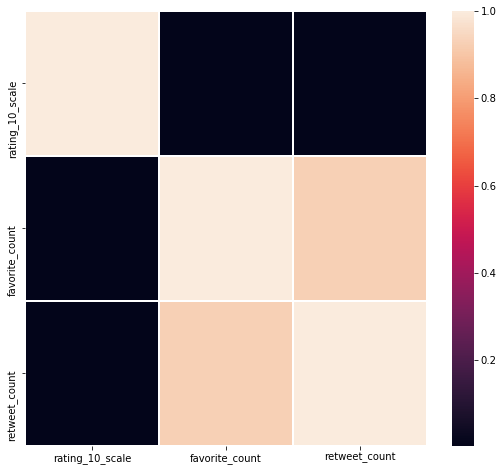

In [100]:
# Creating a smaller df with the numerical values to make a hetmap matrix of the correlations
df_corr_values = df_master[['rating_10_scale', 'favorite_count', 
                               'retweet_count']]

fig, ax = plt.subplots(figsize=(9,8))
correlation = df_corr_values.corr()

sns.heatmap(correlation, 
            xticklabels=correlation.columns.values,
            yticklabels=correlation.columns.values,
            ax=ax,
            linewidth= 0.5);

There is no correlation between rating and favorite count and retweet count, which  makes sense as rating is "only" part of the site's joke and can be absolutely random, not reflecting any particular meaning. However, we can find a correlation between favorite count and retweet count. That can be considered normal as more retweet means more favorites.

I would like to find the most popular and loved dog breeds. As rating has not anything to do with popularity, I will rate popularity by retweets and favorites, assuming that the cuter the dog breed is the higher the retweets are.

At first, I made a histogram of the most popular dogs on the site to get a closer look. I made a workaround to color the bar borders accoring to this issue: https://github.com/matplotlib/matplotlib/issues/9351/.

#### II. Most Popular Dog Names on the Account

I would like to find the most popular dog names. As rating has not anything to do with popularity, in this case, I will rate popularity by the number of tweets, assuming that the most popular dog names occur more times on the site.

The most often tweeted dognames are Charlie, Lucy, Oliver and Cooper. Other names such as Lola, Daisy and Bella are also quiet popular. 

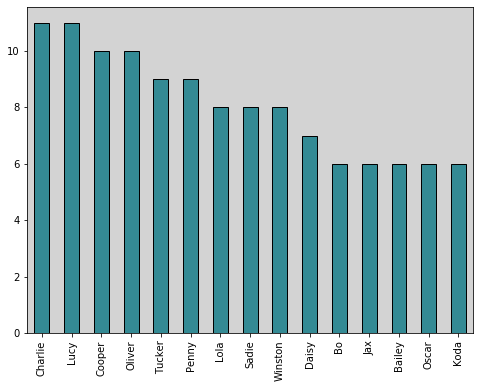

In [101]:
fig, ax = plt.subplots(figsize=(8,6))

names = df_master['dog_name']
names.value_counts().head(15).plot(kind = 'bar', color = "#348A94", ax = ax, edgecolor = ['Black']*len(names))
ax.set_facecolor('#D3D3D3')
plt.show();

#### II. Most Beloved Breeds

After that, I analyzed the relationship between the numbers of favorite and dog breeds to find out which dog breeds are the most beloved by the users. I used the most relevant results of the machine learning values, categorized the dog breeds based on pictures. According to my results, golden retrivers are the all time favorites among the users with almost 1600000 favorites, the second and third breeds are labrador retrievers (about 1000000 favorites) and pembrokes (about 1000000 favorites). 

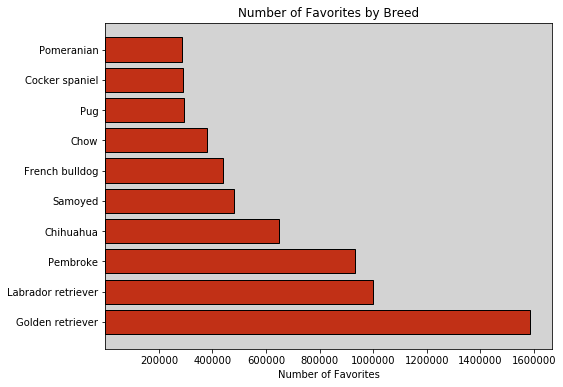

In [102]:
# Creating a favorite dataframe by the groupped breeds, counted the favorites.
df_favorite = df_master.groupby('p1')['favorite_count'].sum().reset_index()
df_sorted = df_favorite.sort_values('favorite_count', ascending=False).head(10)
ser_fav = df_sorted['favorite_count']
ser_breed = df_sorted['p1']

fig, ax = plt.subplots(figsize=(8,6))
fav = plt.barh(ser_breed, ser_fav, color = "#C13016", edgecolor = ['Black']*len(ser_breed))
ax.set_facecolor('#D3D3D3')
plt.xlabel('Number of Favorites')
plt.title('Number of Favorites by Breed')
plt.xticks(np.arange(200000, 1800000, 200000))
plt.show();

#### III. Dog Stages

I analyzed the specific "dog stages", excluding the missing values to make a pie chart about the proportions of the categories. The most often used stage is "pupper" with more than 65%, the second one is "doggo" (about 22%). The account owners use the words puppo and floofer in 10% of the cases all together.

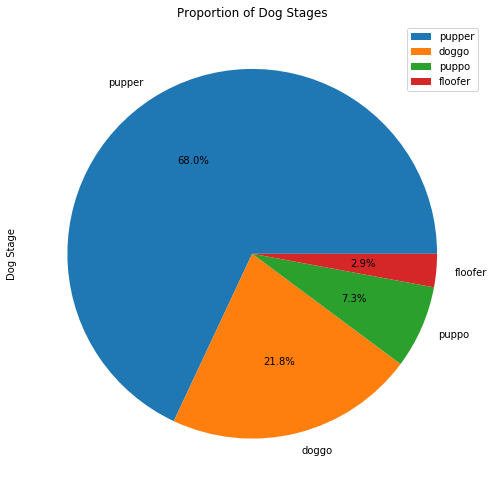

In [103]:
# Exclude the cases where the dog stage is missing.
df_stage = df_master[df_master['dog_stage'] != "None"]
fig, ax = plt.subplots(figsize=(8.5,8.5))

df_stage['dog_stage'].value_counts().plot(kind = 'pie', ax = ax, label = 'Dog Stage', autopct='%1.1f%%')
plt.title('Proportion of Dog Stages')
plt.legend();

#### IV. Ratings

I analyzed the portions of the ratings. I decided to use the qcut function to make the parts of the piechart almost equial and better readable. I gave the categories funny names to emphasize that higher rating often means cuter dogs. According to the results, most of the dogs are rated between 0 and 13, only 3% of the dogs are rated higher than 13. However, the highest rate is 1776! The numerators exceed the nominators in 40% of the cases, 40% of the dogs have higher ratings that 10.

In [104]:
# Exclude the negative or null values from the dataframe
df_cuteness = df_master[df_master['rating_10_scale'] > 0]

In [105]:
cute_label = ['Good Dog (0.999, 9.0]', 'Adorable (9.0, 10.0]', 'Supertcute (10.0, 11.0]', 'Unbelieveable (11.0, 12.0]', 'Can I pet her pleeeeease?  (12.0, 13.0]', 'Who is the good boy? (13.0, 1776.0]']

cute_bins = pd.qcut(df_cuteness['rating_10_scale'], 6, labels = cute_label)

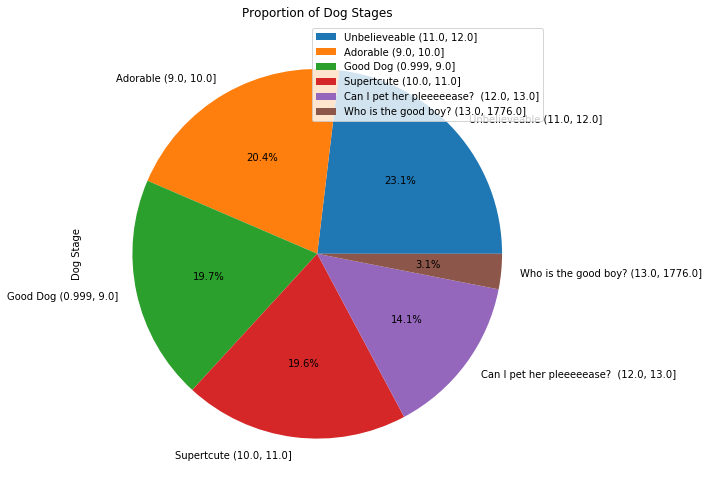

In [106]:
fig, ax = plt.subplots(figsize=(8.5,8.5))
cute_bins.value_counts().plot(kind = 'pie', ax = ax, label = 'Dog Stage', autopct='%1.1f%%')
plt.title('Proportion of Dog Stages')
plt.legend();

### Conclusion:

We got some interesting finding related to the Twitter account WeRateDogs. Some conclusions supported our
assumptions and correspond our daily experiences, for example golden retrievers are very popular all over the
world and a lot of dog owner name his dog Lucy. On the other hand, its unique that the dogs are not not strictly rated on a scale of 0 to 10.